# SQL Agent 

#### What are Agents? 
At a high level, agents combine large language models (LLMs) with access to external data sources and/or functions in order to accomplish specific tasks in an intelligent, dynamic way.

Think of a regular LLM as a very knowledgeable research assistant. It can provide information and analysis based on its training data, but it can't directly interact with the world beyond just taking in text prompts.

An agent, on the other hand, is like giving that research assistant a suite of tools and abilities to gather information, analyze data, execute actions, and even create or manipulate real-world artifacts directly. The LLM acts as the reasoning engine that determines what tools/actions are needed and in what order to complete an overarching task or workflow.

**An agent could be thought of as**:

`Agent = LLM + Relevant Data/APIs/Templates + Function Tools`

Some *example capabilities* this enables:
- An agent could use web browsing tools to search for information, analyze/summarize webpages with the LLM, and generate a report compilingthe insights
- An agent could interface with databases, APIs, and filesystems to retrieve, process, and synthesize information from multiple sources into a coherent answer
- An agent could leverage code editing/execution tools to write, run, and iteratively improve software programs based on high-level requirements

Agents use a LLMs to dynamically determine a sequence of actions (tools) to take in order to accomplish a task, rather than having a hardcoded sequence.

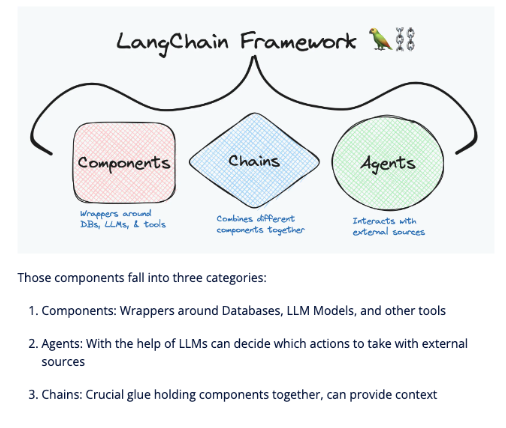Reference: [GenAI Agents - Querying Data Warehouse](https://blog.ippon.tech/tapping-into-genai-query-your-snowflake-data-warehouse-with-langchain-aws-bedrock_)


#### What are the main components of an Agent? 

- **Agent**: Decides which action/tool to use next based on inputs
- **AgentExecutor**: Executes the actions chosen by the Agent
- **Tools**: Functions that the Agent can call to perform tasks
- **Toolkits**: Groups of related tools for common tasks

References:
- [LangChain - Agent](https://python.langchain.com/docs/modules/agents/)
- [LangChain - Agent Concepts](https://python.langchain.com/docs/modules/agents/concepts/)

#### Building an agent involves:

1. Choosing a language model
2. Selecting a prompt to guide the agent's reasoning
3. Defining the available tools the agent can use
4. Initializing the Agent with the LLM, prompt, and tools
5. Using the AgentExecutor to run theAgent and execute its chosen actions
                  
#### SQL Agent
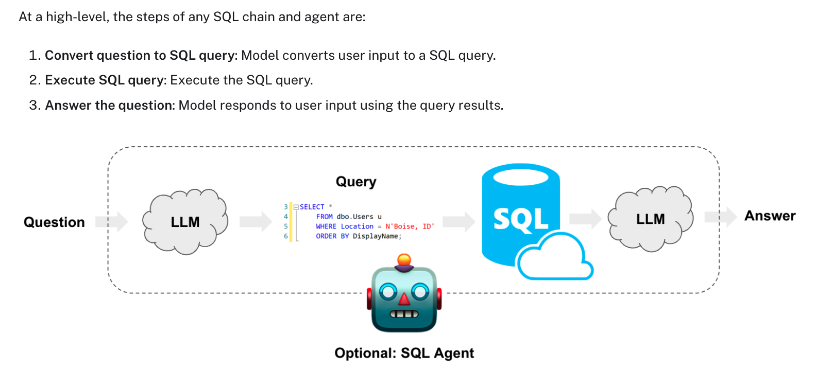
Reference: [LangChain - SQL Agent](https://python.langchain.com/docs/use_cases/sql/quickstart/)


A text-to-SQL agent is a type of agent system that can convert natural language questions or instructions into SQL queries that can be executed against a database.
The way it works is:

1. The user provides a natural language input, like "Show me all customers from California who made a purchase in the last month."
2. The language model component of the agent analyzes the semantics and intent behind the natural language input.
3. The agent has access to a set of tools related to databases, like:
    - A schema viewer to inspect the database structure
    - Functions to parse and build SQL queries
    - A SQL execution tool to run queries against the database
4. Using its reasoning capabilities, the language model determines the best tools and sequence of steps needed to fulfill the user's intent.

This could involve:

- Querying the schema to identify the relevant tables/columns
- Constructing SQL WHERE clauses to filter by location and date
- Joining tables if needed
- Building an aggregate query if asking for summary statistics

#### Anthropic's Claude API:

Directions to access Claude's API using this [link](https://docs.anthropic.com/claude/docs/getting-access-to-claude).
To access Claude, you'll first need to create an account on our Console:

1. Visit Anthropic's web [Console](https://console.anthropic.com/) and enter your email.
2. Verify your email address by clicking the link in the confirmation email sent to you.
3. Once your account is verified, log in to the [Console](https://console.anthropic.com/).

This guide will walk you through the process step by step.

References:
- [Anthropic LangChain](https://python.langchain.com/docs/integrations/platforms/anthropic/)
- [Anthropic - SQL Sorcerer](https://docs.anthropic.com/claude/page/sql-sorcerer)
- [LangChain - SQL Use Cases](https://python.langchain.com/docs/use_cases/sql/)
- [LangChain - SQL Query Checking](https://python.langchain.com/docs/use_cases/sql/query_checking/)

In [1]:
from langchain_anthropic import ChatAnthropic
import os 
os.environ['ANTHROPIC_API_KEY'] = ''
llm = ChatAnthropic(model='claude-3-sonnet-20240229')

### What is SQL Database in LangChain?

SQLDatabase is a class within LangChain that acts as a wrapper around SQLAlchemy, a popular SQL toolkit and Object-Relational Mapping (ORM) system for Python. This class facilitates the interaction with databases by allowing SQL queries to be generated and executed based on user inputs. It supports various SQL dialects and can connect to almost any database that SQLAlchemy can interface with.

### Initialize the Database:
Here’s how you can connect to a local SQLite database, which is straightforward because it doesn't require running a database server. Ensure you have the .db file prepared with the necessary tables and data.

In [2]:
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase

db = SQLDatabase.from_uri("sqlite:///sql_db/emergency_department_database.db")

In [3]:
# Print the SQL dialect being used
print(db.dialect)

sqlite


In [4]:
# Fetch and print usable table names in the database
print(db.get_usable_table_names())

['diagnosis', 'edstays', 'medrecon', 'pyxis', 'triage', 'vitalsign']


### Querying the Database:
After establishing the connection, you can perform queries to fetch or manipulate data. This step is crucial for testing your setup and verifying that the database responds as expected.

In [6]:
# Run a select query to fetch the first 10 records from the 'vitalsign' table
query_output = db.run("SELECT * FROM vitalsign LIMIT 10;")

In [7]:
query_output

"[(10014729, 37887480, '2125-03-19 13:22:00', None, 124.0, 24.0, 100.0, 93.0, 65.0, None, None), (10014729, 37887480, '2125-03-19 18:28:00', 98.9, 106.0, 18.0, 100.0, 115.0, 70.0, 'Sinus Tachycardia', '5'), (10014729, 37887480, '2125-03-19 13:07:00', None, 128.0, 18.0, 100.0, 132.0, 96.0, 'Sinus Tachycardia', None), (10014729, 37887480, '2125-03-19 16:23:00', 99.8, 115.0, 22.0, 97.0, 114.0, 45.0, 'Sinus Tachycardia', '0'), (10014729, 37887480, '2125-03-19 13:24:00', None, 125.0, None, None, None, None, None, None), (10014729, 37887480, '2125-03-19 14:00:00', None, 108.0, 22.0, 97.0, 131.0, 60.0, 'Sinus Tachycardia', '0'), (10026255, 34236274, '2201-07-07 16:14:00', 99.0, 142.0, 26.0, 92.0, 132.0, 88.0, 'Atrial Fibrillation', '7'), (10026255, 34236274, '2201-07-07 18:55:00', 97.7, 98.0, 28.0, 98.0, 124.0, 90.0, 'Sinus Rhythm', '7'), (10026255, 34236274, '2201-07-07 13:52:00', None, 150.0, 18.0, 93.0, 133.0, 101.0, 'Atrial Fibrillation', '8'), (10026255, 34236274, '2201-07-07 16:01:00', 

### Creating SQL Query Chain Overview

The `create_sql_query_chain` function from LangChain's `sql_database` module is designed to generate SQL queries based on user-provided questions. This function integrates a language model and a database connection to construct and execute SQL queries effectively. Below are the key features and details:

- **Language Model (`llm`)**: Required to interpret the user's natural language question and formulate the corresponding SQL query.
- **SQL Database (`db`)**: Connection required to execute the generated SQL queries.
- **Prompting (`prompt`)** (Optional): Pass agent a template to guide the generation of the query. If no prompt is provided, the system selects a default based on the SQL database dialect.
- **Number of Results (`k`)** (Optional): Specifies the number of results to return per select statement, defaulting to five if not provided.
  
#### Output
- Returns a chain that accepts a question and outputs a SQL query tailored to retrieve the answer from the database.

This function exemplifies the integration of natural language processing with database management, providing a powerful tool for creating dynamic and context-aware database queries.

- Reference: [LangChain - create_sql_query_chain](https://api.python.langchain.com/en/latest/chains/langchain.chains.sql_database.query.create_sql_query_chain.html)

In [8]:
from langchain.chains import create_sql_query_chain

chain = create_sql_query_chain(llm, db)
chain

RunnableAssign(mapper={
  input: RunnableLambda(...),
  table_info: RunnableLambda(...)
})
| RunnableLambda(lambda x: {k: v for k, v in x.items() if k not in ('question', 'table_names_to_use')})
| PromptTemplate(input_variables=['input', 'table_info'], partial_variables={'top_k': '5'}, template='You are a SQLite expert. Given an input question, first create a syntactically correct SQLite query to run, then look at the results of the query and return the answer to the input question.\nUnless the user specifies in the question a specific number of examples to obtain, query for at most {top_k} results using the LIMIT clause as per SQLite. You can order the results to return the most informative data in the database.\nNever query for all columns from a table. You must query only the columns that are needed to answer the question. Wrap each column name in double quotes (") to denote them as delimited identifiers.\nPay attention to use only the column names you can see in the tables below. B

In [9]:
response = chain.invoke({"question": "How many unique medications are there for the 10026255 patient"})

In [10]:
print(response)

Question: How many unique medications are there for the 10026255 patient?
SQLQuery:
SELECT COUNT(DISTINCT "name")
FROM medrecon
WHERE "subject_id" = 10026255
UNION
SELECT COUNT(DISTINCT "name")
FROM pyxis
WHERE "subject_id" = 10026255
LIMIT 5;


In [11]:
import re
import pandas as pd
str_query = re.split("SQLQuery:", response)[-1].strip()

In [12]:
db.run(str_query)

'[(6,)]'

In [13]:
import sqlite3
conn = sqlite3.connect('sql_db/emergency_department_database.db')
df = pd.read_sql_query(str_query, conn) 

In [14]:
df

,"COUNT(DISTINCT ""name"")"
0,6


In [18]:
response2 = chain.invoke({"question": "Can you tell me about the triage and vitalsign metrics for patient 10014354?"})

In [19]:
print(response2)

SQLQuery:
SELECT 
    "subject_id",
    "temperature", 
    "heartrate", 
    "resprate", 
    "o2sat", 
    "sbp", 
    "dbp", 
    "pain"
FROM triage
WHERE "subject_id" = 10014354
LIMIT 5;

SELECT 
    "subject_id",
    "charttime",
    "temperature",
    "heartrate", 
    "resprate", 
    "o2sat", 
    "sbp", 
    "dbp", 
    "pain"
FROM vitalsign
WHERE "subject_id" = 10014354
ORDER BY "charttime" DESC
LIMIT 5;


In [20]:
str_query = re.split("SQLQuery:", response2)[-1].strip()

In [23]:
ls = str_query.split(';')

In [25]:
ls

['SELECT \n    "subject_id",\n    "temperature", \n    "heartrate", \n    "resprate", \n    "o2sat", \n    "sbp", \n    "dbp", \n    "pain"\nFROM triage\nWHERE "subject_id" = 10014354\nLIMIT 5',
 '\n\nSELECT \n    "subject_id",\n    "charttime",\n    "temperature",\n    "heartrate", \n    "resprate", \n    "o2sat", \n    "sbp", \n    "dbp", \n    "pain"\nFROM vitalsign\nWHERE "subject_id" = 10014354\nORDER BY "charttime" DESC\nLIMIT 5',
 '']

In [29]:
conn = sqlite3.connect('sql_db/emergency_department_database.db')

df_ls = []
for i in ls: 
    if i != '':
        i = re.sub('\n\n', '', i)
        df = pd.read_sql_query(i, conn) 
        df_ls.append(df)

In [33]:
df_ls

[   subject_id  temperature  heartrate  resprate  o2sat    sbp   dbp pain
 0    10014354          NaN        NaN       NaN    NaN    NaN   NaN   UA
 1    10014354         98.3       57.0      18.0   99.0  161.0  68.0    0
 2    10014354         97.3       80.0      18.0   99.0  138.0  78.0    4
 3    10014354        100.2      106.0      20.0   99.0  142.0  73.0    5
 4    10014354         99.4       80.0      18.0   98.0  158.0  72.0   10,
    subject_id            charttime  temperature  heartrate  resprate  o2sat  \
 0    10014354  2150-07-02 22:40:00          NaN       70.0      14.0   95.0   
 1    10014354  2150-07-02 20:23:00          NaN       75.0      18.0   97.0   
 2    10014354  2150-07-02 19:23:00          NaN       70.0      16.0   98.0   
 3    10014354  2150-07-02 18:29:00          NaN       71.0      16.0  100.0   
 4    10014354  2150-07-02 15:50:00         97.7       78.0      19.0   98.0   
 
      sbp   dbp  pain  
 0  129.0  64.0  None  
 1  144.0  66.0  None  
 

In [31]:
df_ls[0]

,subject_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain
0,10014354,NaN,NaN,NaN,NaN,NaN,NaN,UA
1,10014354,98.3,57.0,18.0,99.0,161.0,68.0,0
2,10014354,97.3,80.0,18.0,99.0,138.0,78.0,4
3,10014354,100.2,106.0,20.0,99.0,142.0,73.0,5
4,10014354,99.4,80.0,18.0,98.0,158.0,72.0,10


In [32]:
df_ls[-1]

,subject_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,pain
0,10014354,2150-07-02 22:40:00,NaN,70.0,14.0,95.0,129.0,64.0,None
1,10014354,2150-07-02 20:23:00,NaN,75.0,18.0,97.0,144.0,66.0,None
2,10014354,2150-07-02 19:23:00,NaN,70.0,16.0,98.0,150.0,60.0,9
3,10014354,2150-07-02 18:29:00,NaN,71.0,16.0,100.0,152.0,61.0,5
4,10014354,2150-07-02 15:50:00,97.7,78.0,19.0,98.0,158.0,44.0,5
